In [213]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/smb38/.local/lib/python3.9/site-packages
sysconfig: /home/smb38/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [214]:
df = pd.read_csv("data/train.csv")

In [215]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

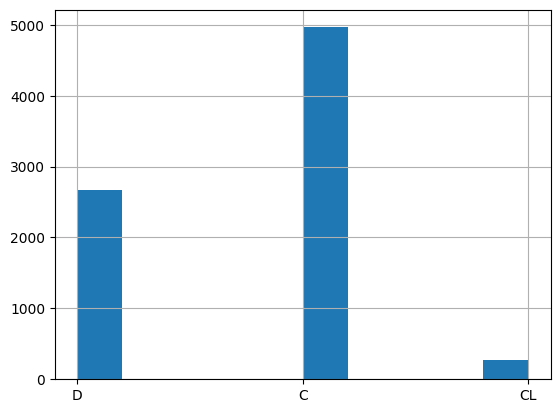

In [217]:
df["Status"].hist()

In [218]:
# unbalanced init!

In [219]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [220]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [221]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [222]:
# nothing empty! lez go

In [223]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [224]:
# create train and validation sets that are divided equally

In [225]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [226]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

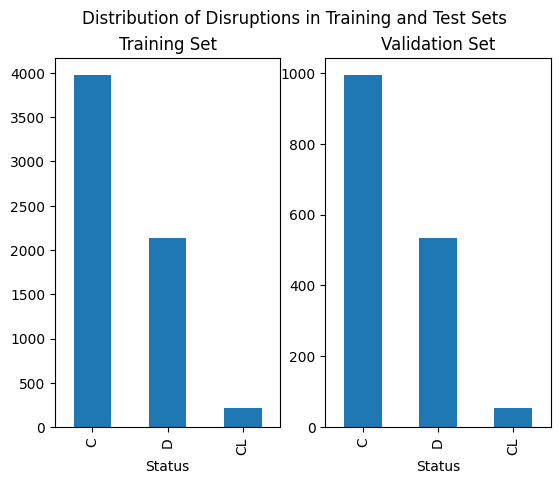

In [227]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [228]:
#the distribution is similar in training and test set

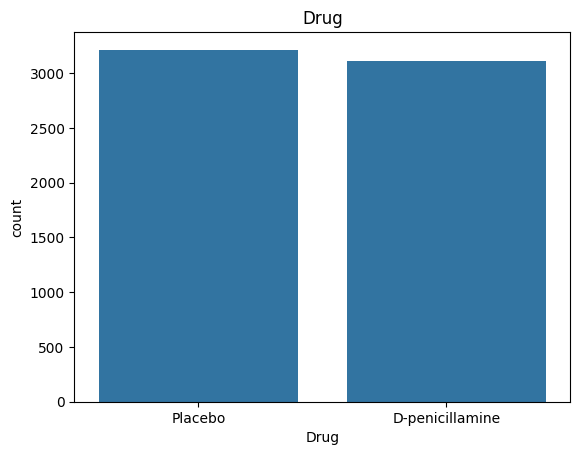

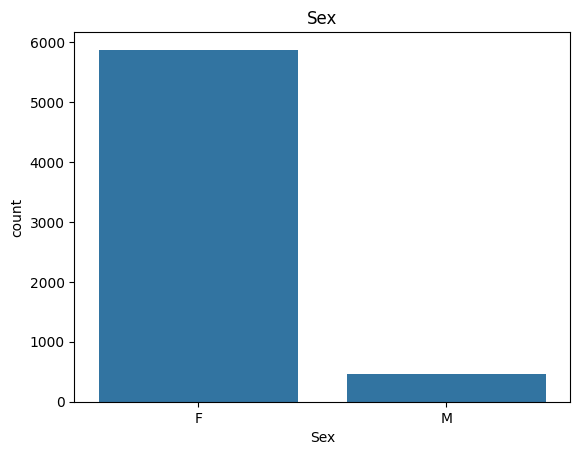

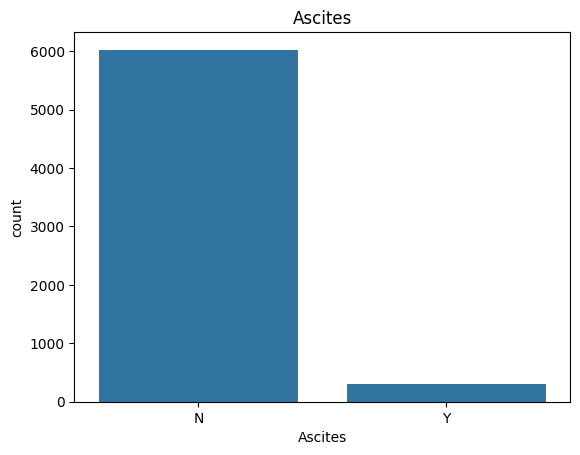

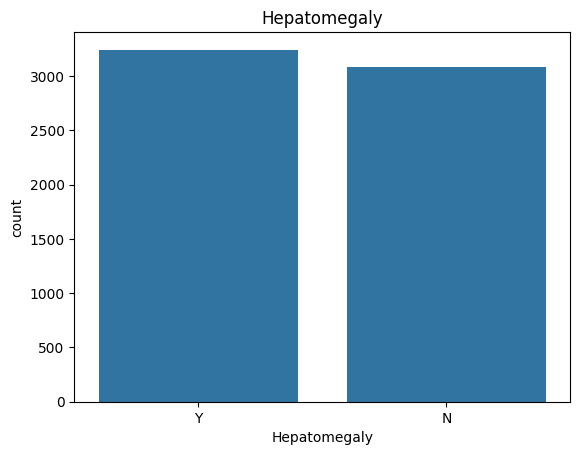

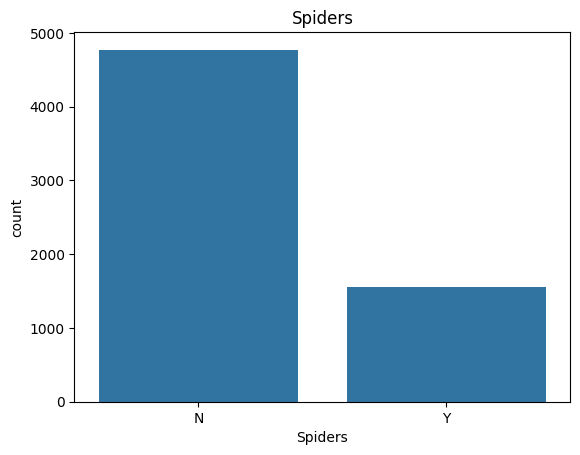

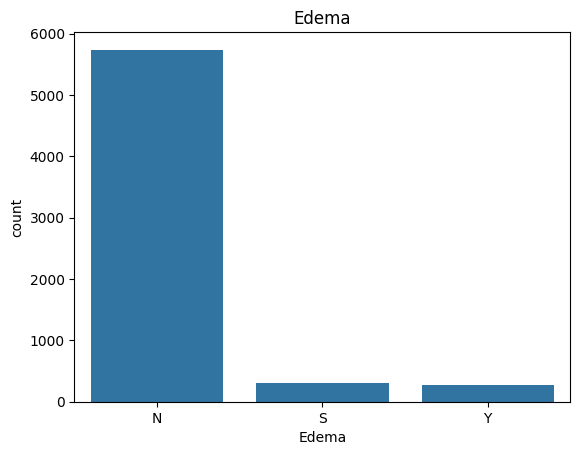

In [229]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [230]:
# i should have done the stratified split which included sex, ascites, spiders, edema 

In [231]:
# Will do it in the next iteration

In [232]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [233]:
#one hot encode the status and edema

In [234]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [235]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
5417,5417,2106,1,21610,0,0,0,0,N,1.1,239.0,4.01,22.0,1065.0,85.25,75.0,221.0,10.9,1.0,C,True,False,False,True,False,False
7521,7521,1682,1,22265,1,0,1,0,N,0.9,222.0,3.86,200.0,1015.0,83.70,154.0,238.0,10.3,3.0,D,True,False,False,False,False,True
5454,5454,694,0,17090,0,0,1,1,N,1.1,498.0,3.80,227.0,1794.0,167.40,200.0,319.0,10.6,3.0,C,True,False,False,True,False,False
7441,7441,110,1,20442,0,1,1,1,Y,14.4,262.0,3.21,220.0,924.0,158.10,154.0,195.0,10.6,4.0,D,False,False,True,False,False,True
4786,4786,769,1,16728,0,0,1,1,N,3.2,244.0,3.57,108.0,620.0,106.95,72.0,228.0,9.8,2.0,D,True,False,False,False,False,True


In [236]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [237]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [238]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
5417,5417,2106,1,21610,0,0,0,0,1.1,239.0,4.01,22.0,1065.0,85.25,75.0,221.0,10.9,1.0,1,0,0,1,0,0
7521,7521,1682,1,22265,1,0,1,0,0.9,222.0,3.86,200.0,1015.0,83.70,154.0,238.0,10.3,3.0,1,0,0,0,0,1
5454,5454,694,0,17090,0,0,1,1,1.1,498.0,3.80,227.0,1794.0,167.40,200.0,319.0,10.6,3.0,1,0,0,1,0,0
7441,7441,110,1,20442,0,1,1,1,14.4,262.0,3.21,220.0,924.0,158.10,154.0,195.0,10.6,4.0,0,0,1,0,0,1
4786,4786,769,1,16728,0,0,1,1,3.2,244.0,3.57,108.0,620.0,106.95,72.0,228.0,9.8,2.0,1,0,0,0,0,1


In [239]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  int64
S                  int64
Y                  int64
C                  int64
CL                 int64
D                  int64
dtype: object

In [240]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [241]:
#visualise corelation matrix

In [242]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.018028,0.000014,0.000871,-0.013126,0.009998,0.023816,0.016096,0.013280,-0.001469,-0.025110,0.012886,0.007733,0.021648,-0.006033,0.001546,0.012402,0.005082,-0.001842,-0.004486,0.007426,-0.015153,0.018808,0.008202
N_Days,-0.018028,1.000000,0.002053,-0.096953,-0.056916,-0.259014,-0.282634,-0.213080,-0.345479,-0.144143,0.258360,-0.279049,-0.023374,-0.237634,-0.180553,0.155798,-0.158245,-0.221160,0.247495,-0.104740,-0.241475,0.337681,-0.067870,-0.318936
Drug,0.000014,0.002053,1.000000,0.106271,0.044921,0.041596,-0.062867,-0.009176,-0.040979,0.011103,-0.027420,-0.002033,0.002163,-0.051179,-0.060686,-0.006440,-0.033404,-0.037928,-0.024254,0.001494,0.033041,-0.022230,0.025502,0.012842
Age,0.000871,-0.096953,0.106271,1.000000,0.114004,0.152644,0.109502,0.053258,0.099163,-0.052721,-0.120885,0.094631,0.033057,-0.021347,0.017143,-0.092939,0.147953,0.120482,-0.143684,0.079561,0.120139,-0.146351,-0.117672,0.195241
Sex,-0.013126,-0.056916,0.044921,0.114004,1.000000,0.030406,0.065180,-0.031912,0.038149,0.032608,-0.024231,0.161310,0.005830,0.068154,0.073869,-0.049556,0.087194,0.039351,-0.057090,0.080574,-0.004610,-0.137072,0.014061,0.134691
Ascites,0.009998,-0.259014,0.041596,0.152644,0.030406,1.000000,0.181361,0.210567,0.380392,-0.048076,-0.327954,0.265942,0.041958,0.113129,0.130452,-0.174089,0.299490,0.173734,-0.535743,0.114048,0.643174,-0.266373,-0.021963,0.280852
Hepatomegaly,0.023816,-0.282634,-0.062867,0.109502,0.065180,0.181361,1.000000,0.329437,0.299939,0.139688,-0.269809,0.274584,0.117607,0.202690,0.160037,-0.195156,0.253293,0.502659,-0.227120,0.139280,0.175450,-0.388072,0.027938,0.385934
Spiders,0.016096,-0.213080,-0.009176,0.053258,-0.031912,0.210567,0.329437,1.000000,0.255214,0.046382,-0.223939,0.252084,0.066363,0.142068,0.081261,-0.166194,0.275463,0.291301,-0.261805,0.137540,0.226846,-0.316873,0.022076,0.315412
Bilirubin,0.013280,-0.345479,-0.040979,0.099163,0.038149,0.380392,0.299939,0.255214,1.000000,0.296843,-0.300986,0.435572,0.127262,0.368806,0.303148,-0.085256,0.289343,0.204895,-0.333687,0.161595,0.303784,-0.422852,0.014364,0.426755
Cholesterol,-0.001469,-0.144143,0.011103,-0.052721,0.032608,-0.048076,0.139688,0.046382,0.296843,1.000000,-0.090756,0.165957,0.129898,0.334819,0.271242,0.087078,0.017047,0.034977,0.032385,-0.001788,-0.044338,-0.186325,0.054716,0.169289


<Axes: >

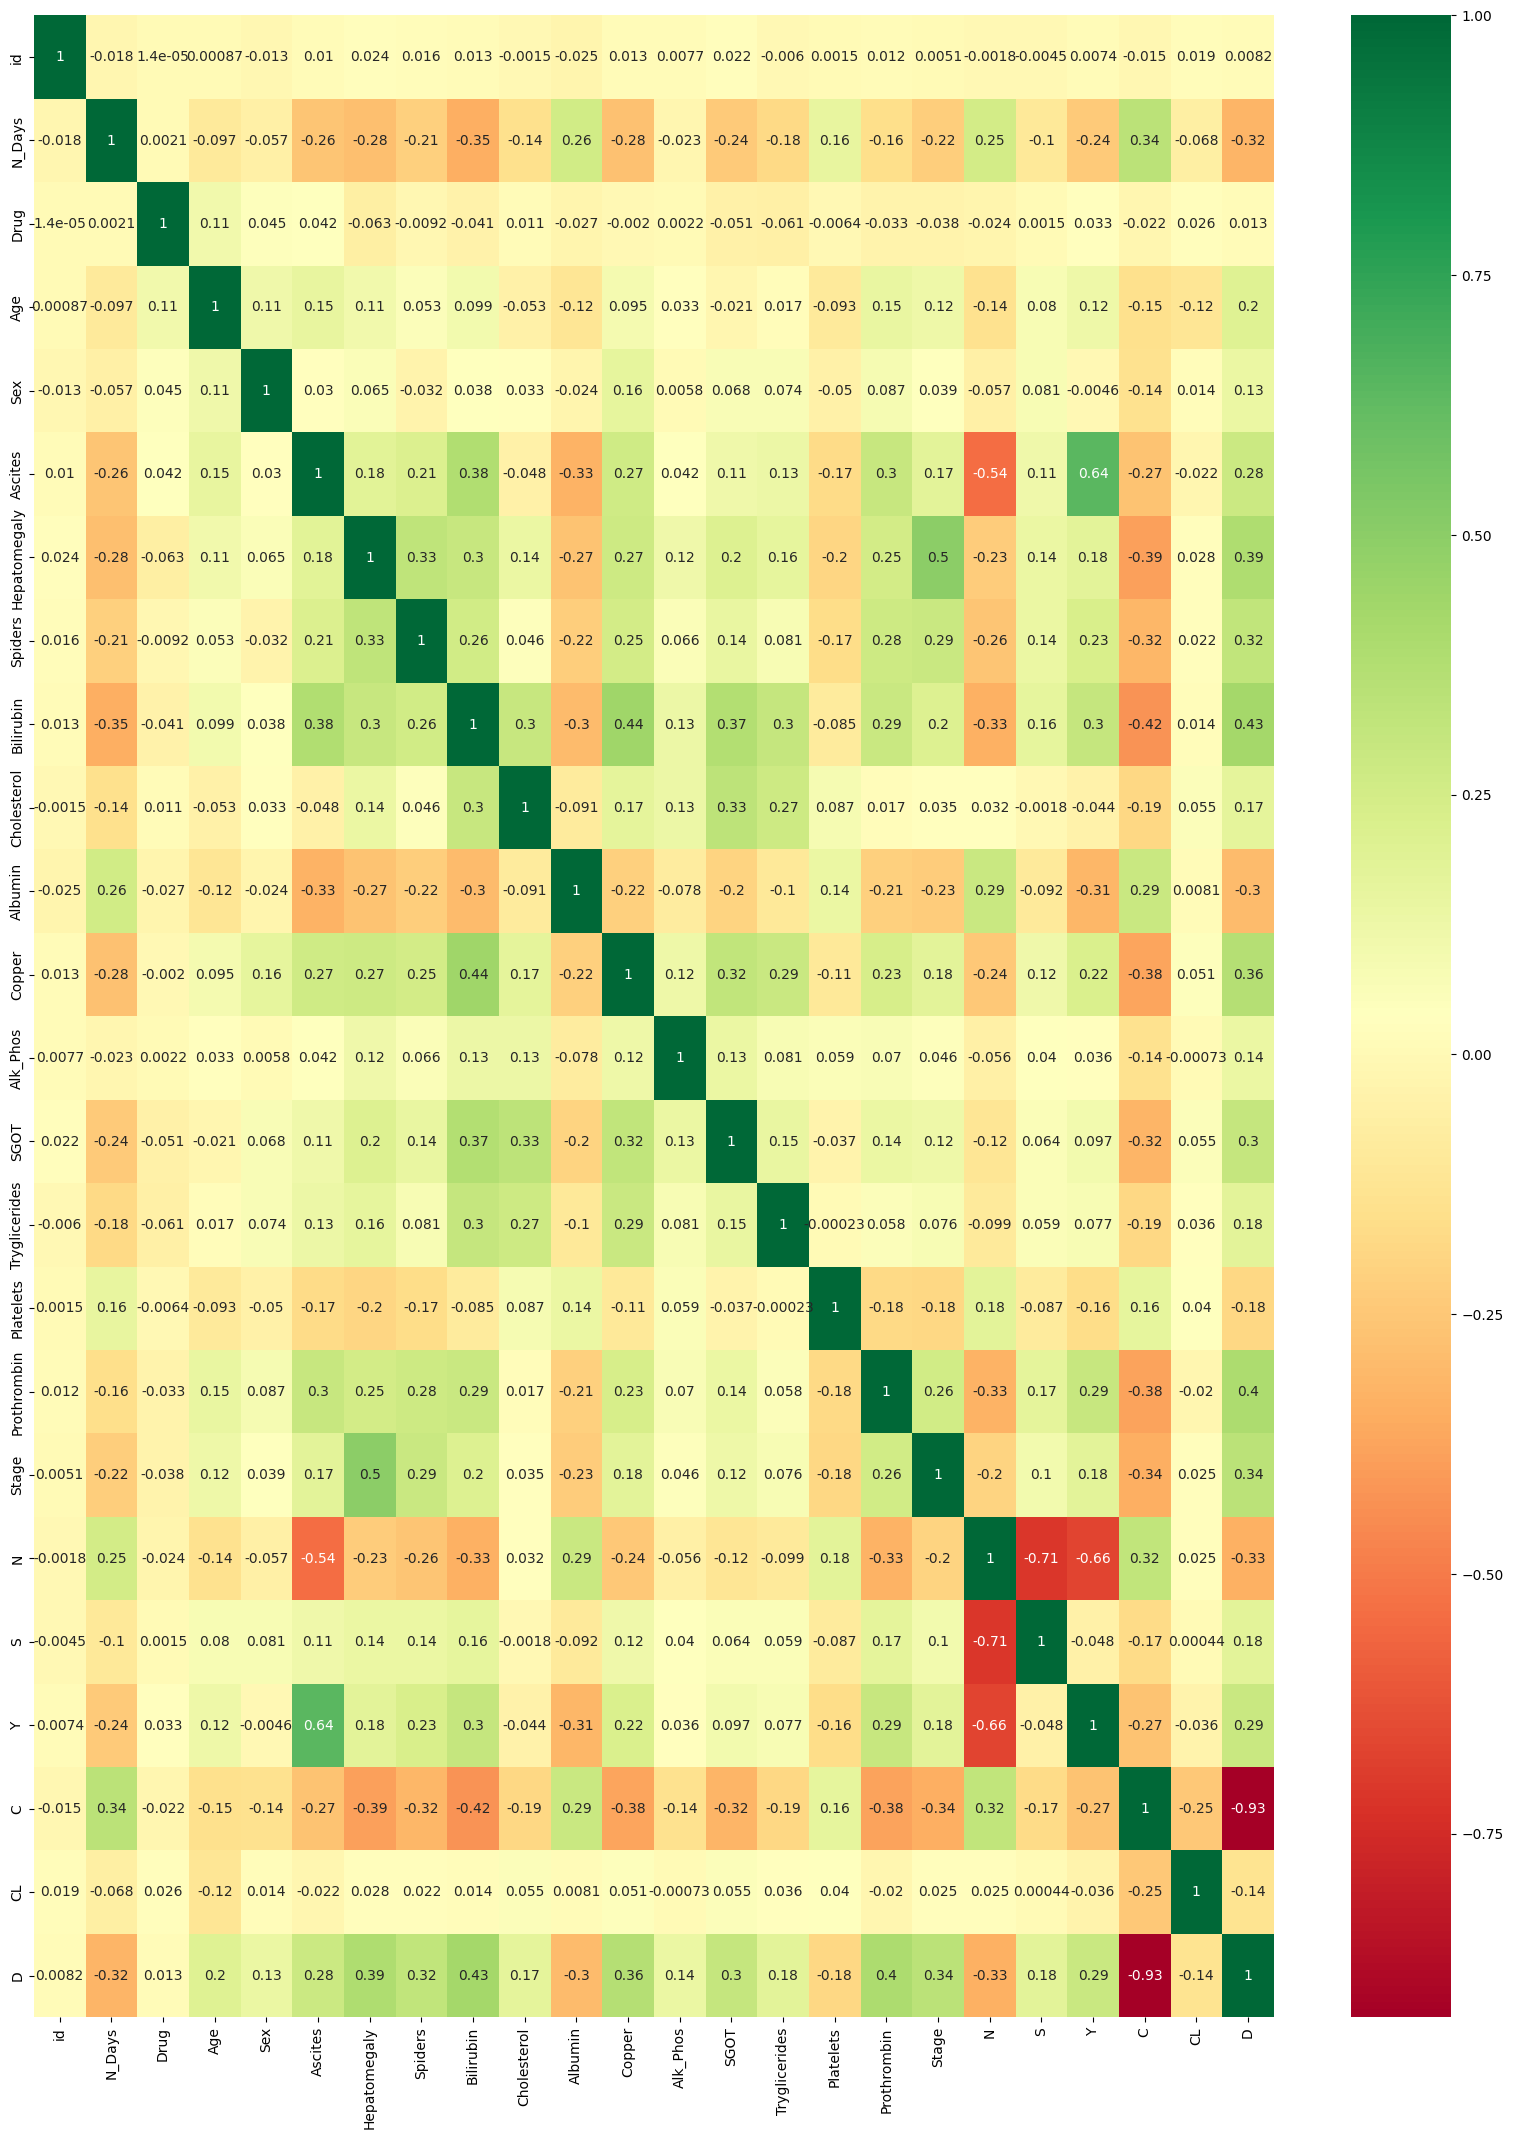

In [243]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

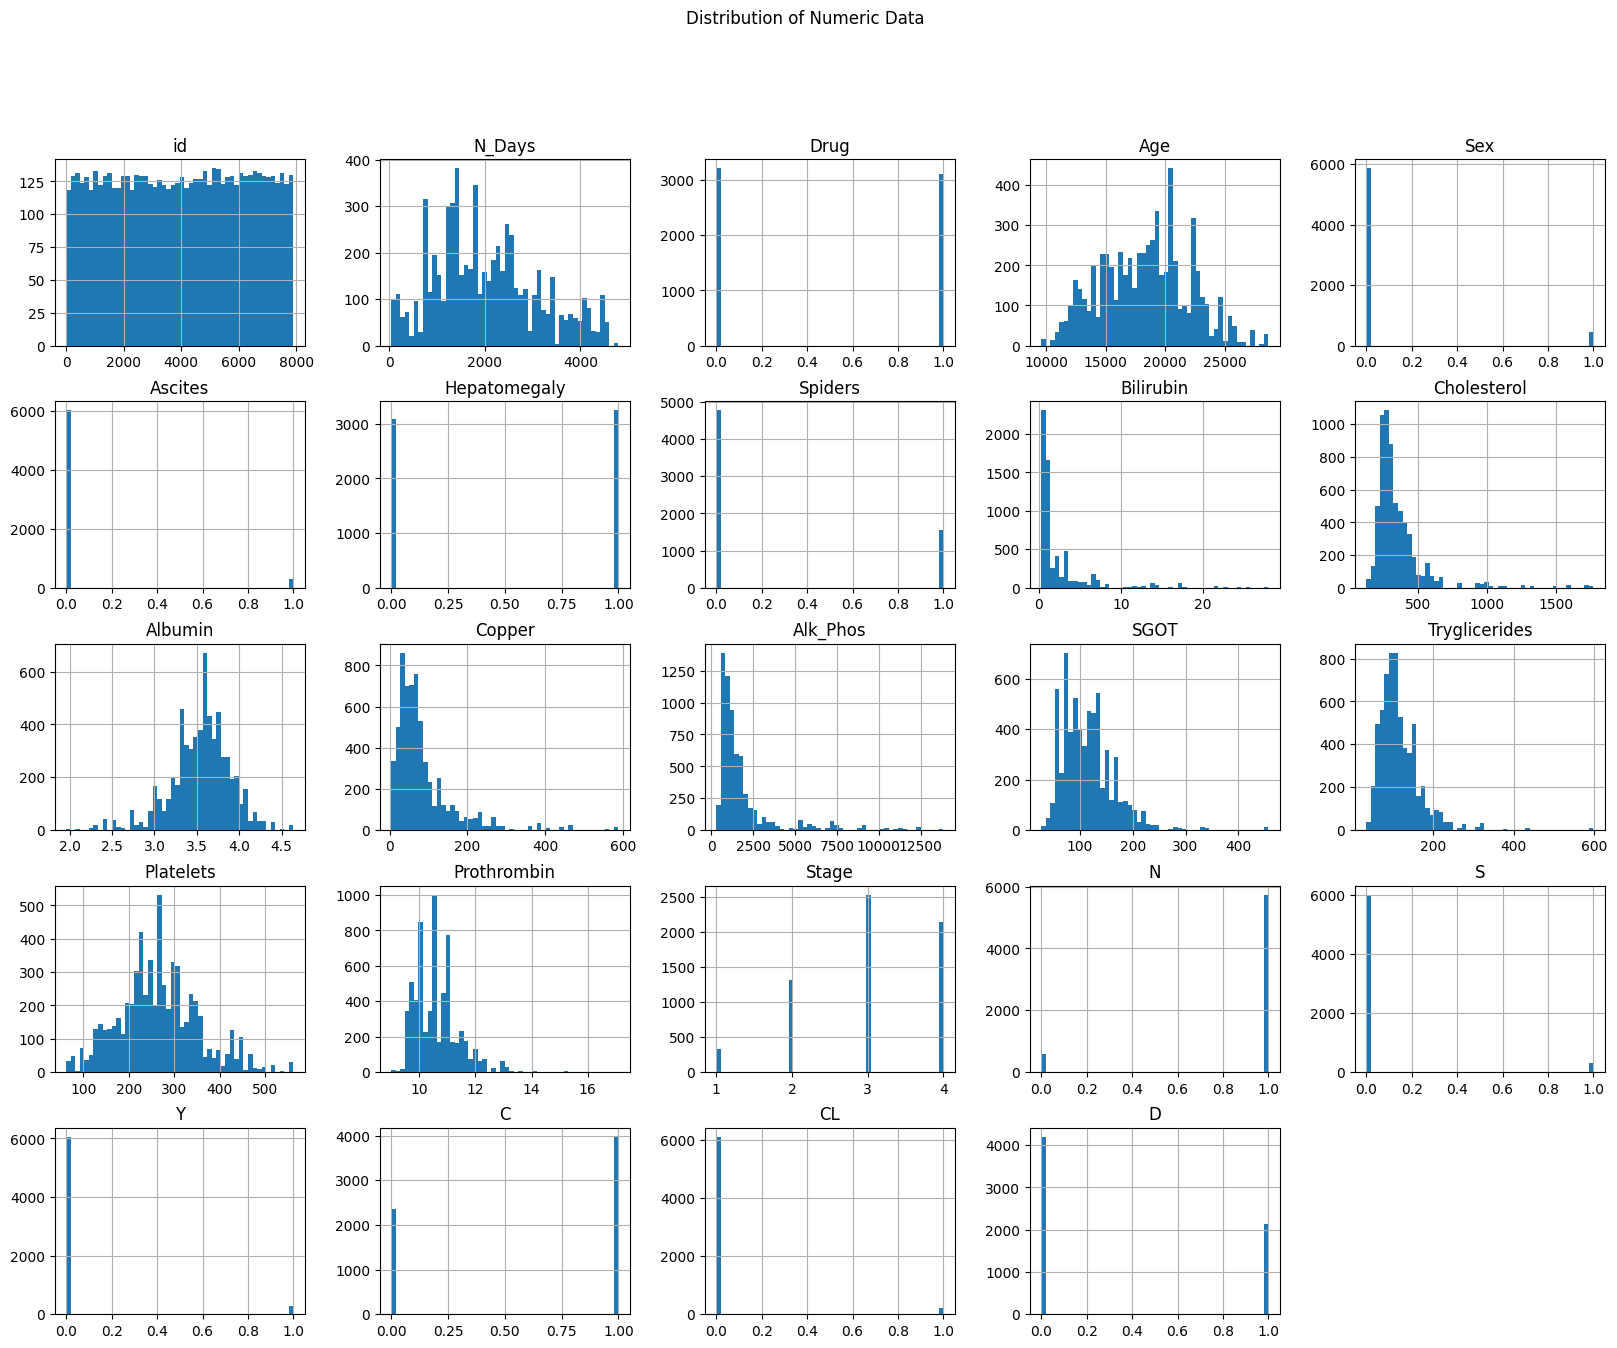

In [244]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [245]:
#Most of the data here needs to be normalised, mostly right skewed

In [246]:
# lets look at the ones that matter

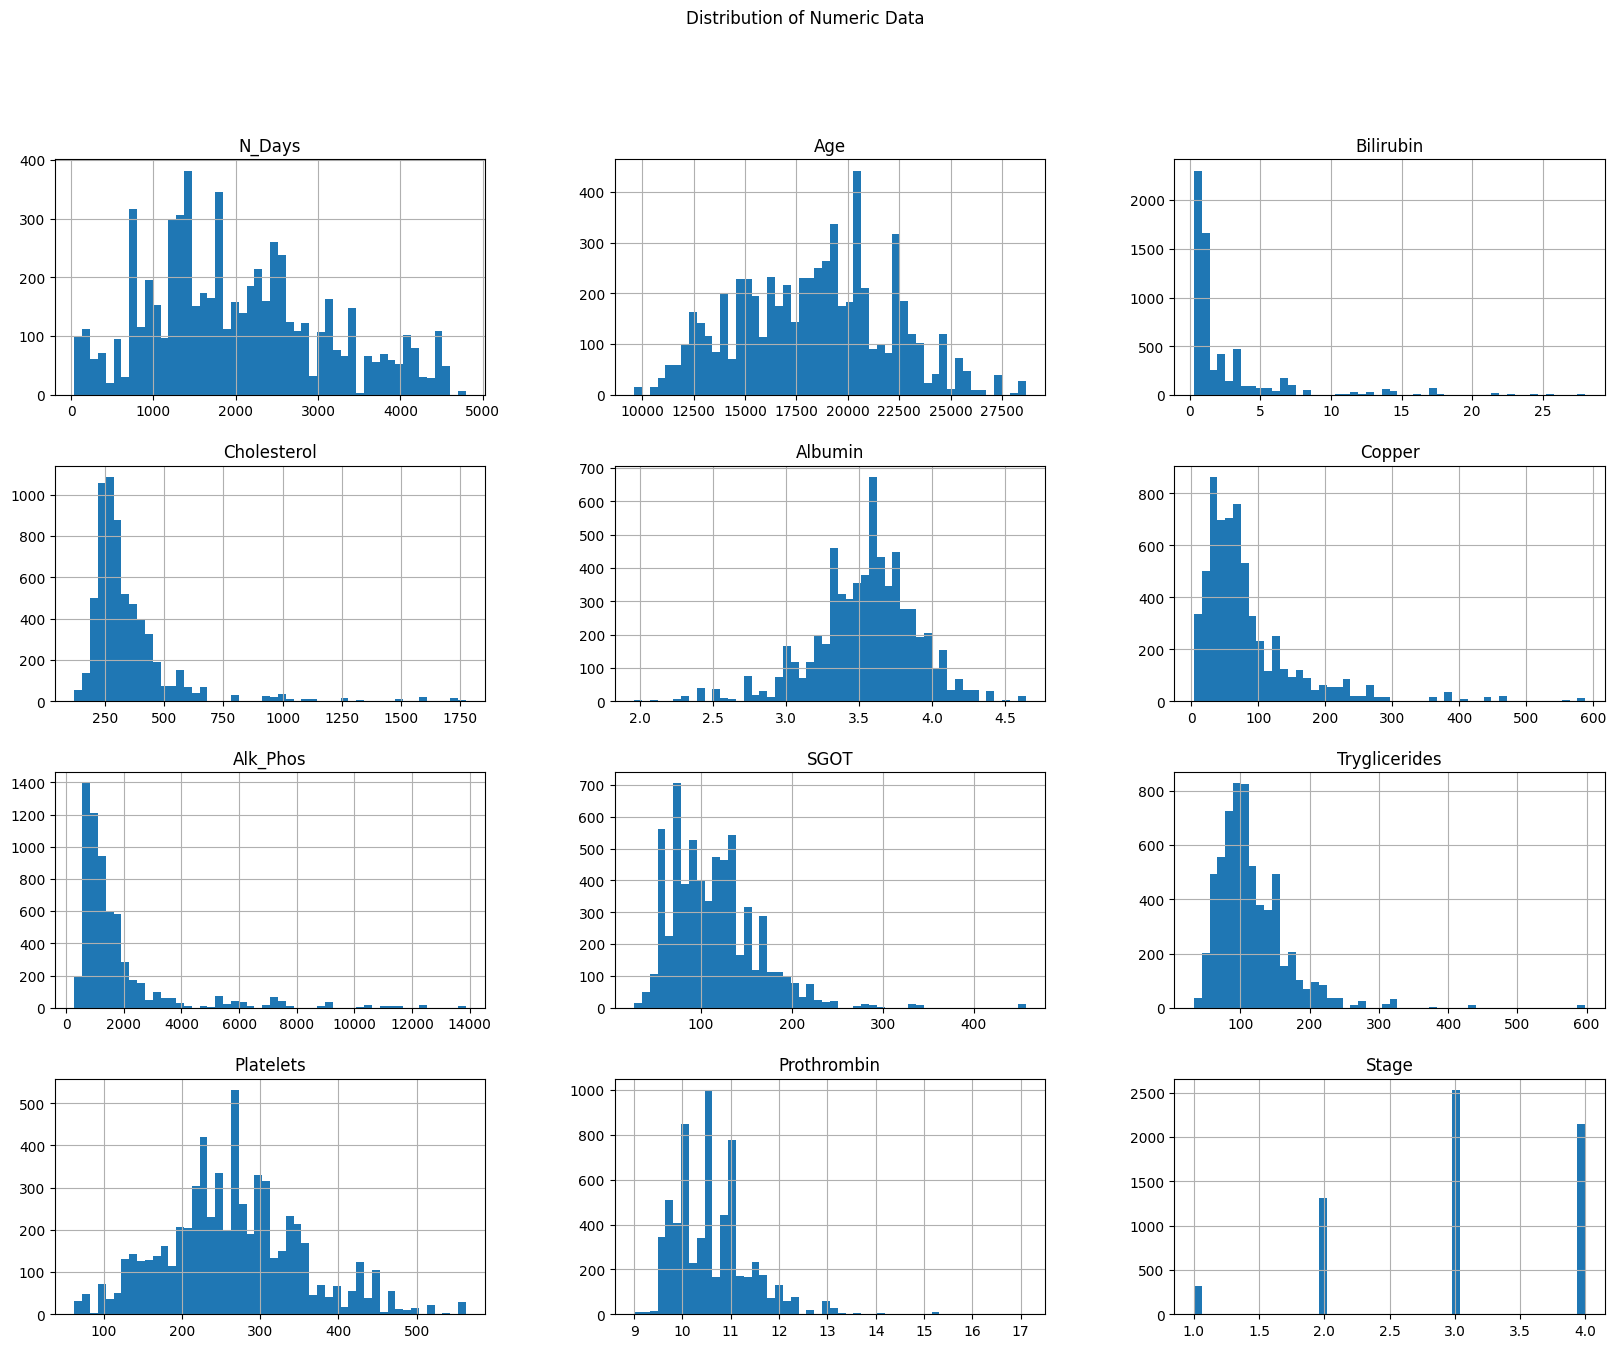

In [247]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [248]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [249]:
# viz after scaling

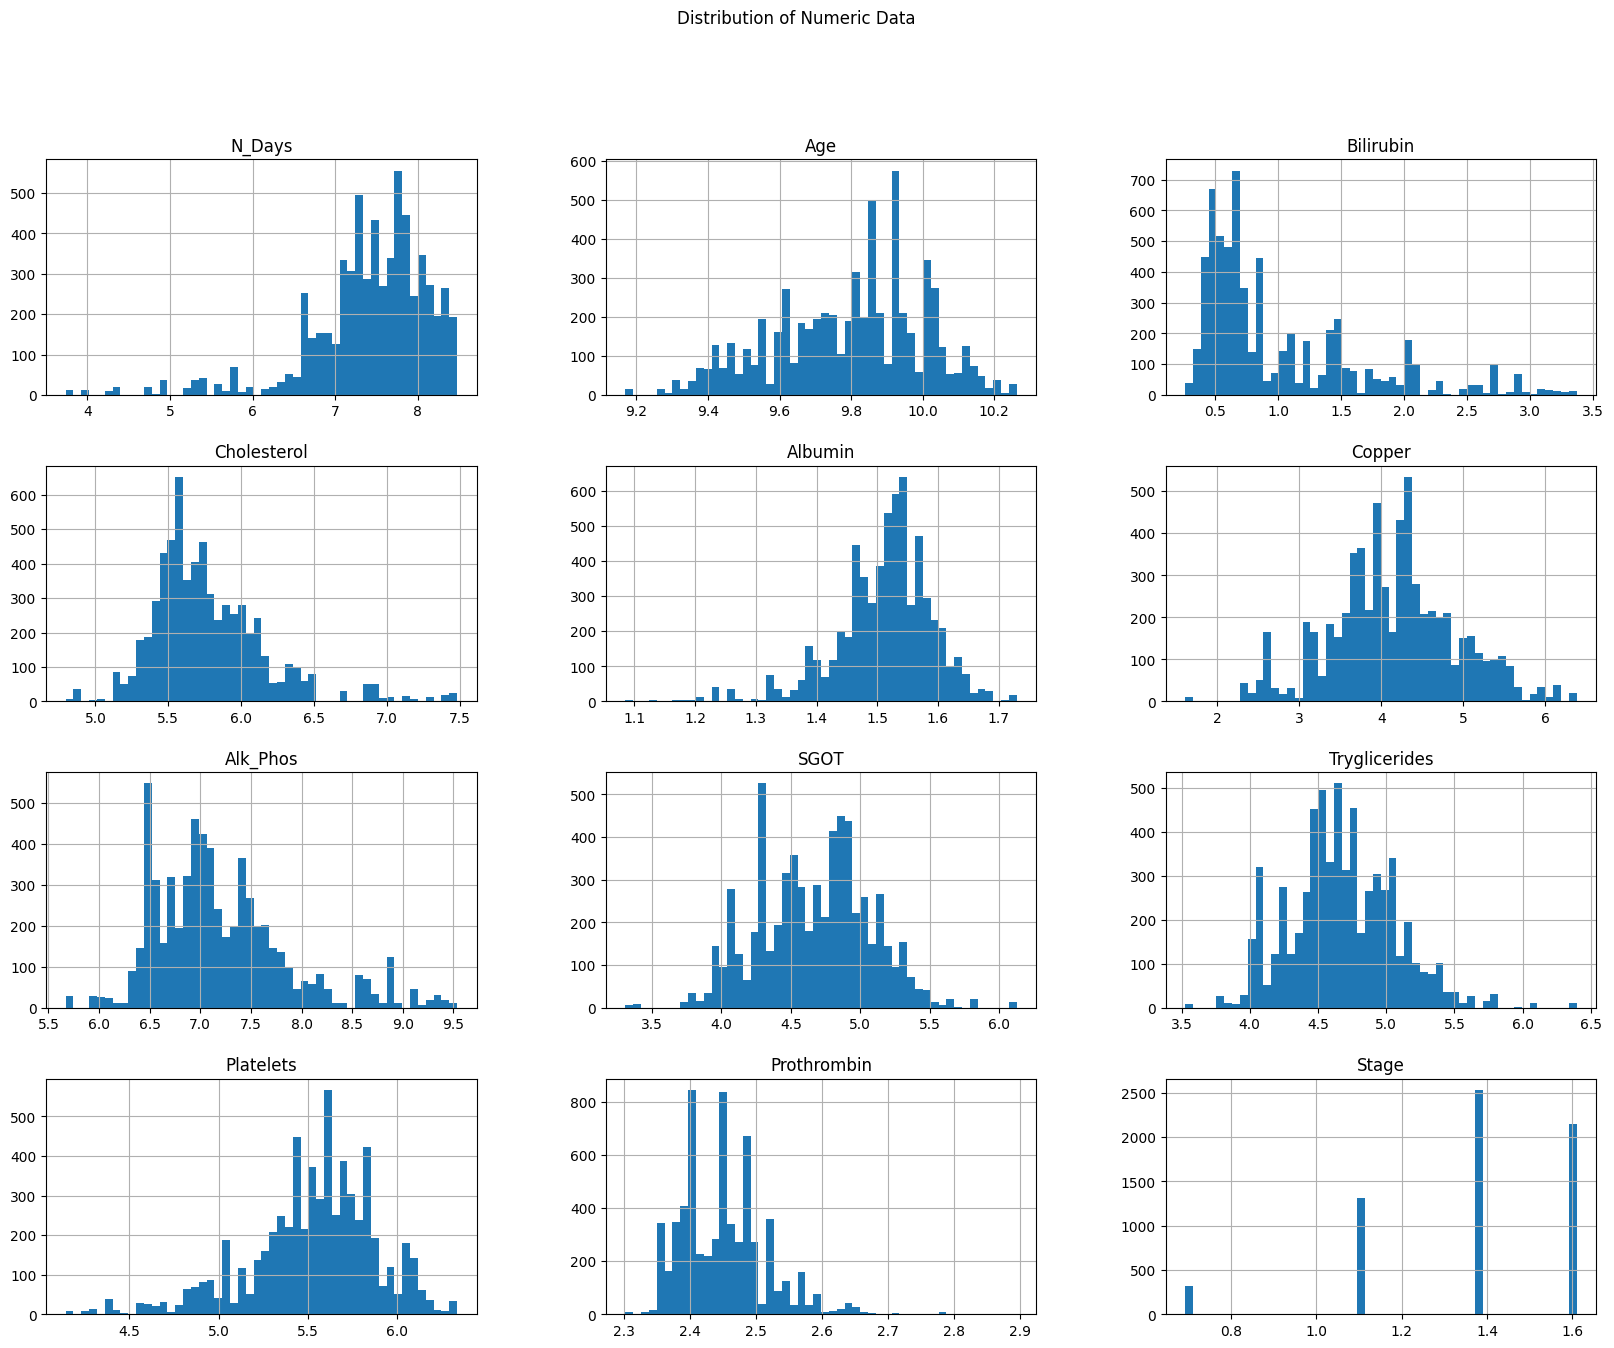

In [250]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [251]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

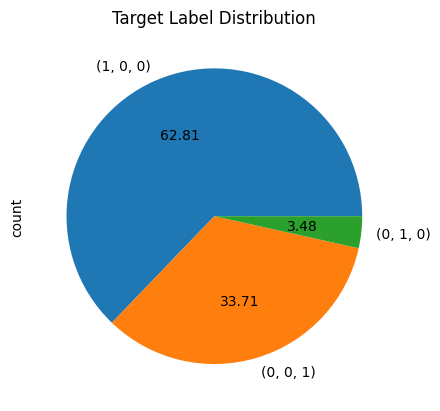

In [252]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [253]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [254]:
# for the next step i presume 